In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importation et Exploration des donnees

Commencons par importer nos donnees a partir de notre fichier csv.

In [119]:
data = pd.read_csv("laptop_data.csv")
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


La colonne 'Unnamed: 0' represente les index pour eviter une repetition on peut soit la supprimer soit l'indiquer comment etant les index. Nous etudierons ensuite les colonnes presentent dans notre jeu de donnees

In [120]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [121]:
columns = data.columns.tolist()
columns

['Company',
 'TypeName',
 'Inches',
 'ScreenResolution',
 'Cpu',
 'Ram',
 'Memory',
 'Gpu',
 'OpSys',
 'Weight',
 'Price']

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


On voit qu'aucune ligne ni aucune colone n'a de valeur manquante mais que certaines colonnes ont besoin d'etre formatter afin d'obtenir des variables quantitatives

In [123]:
data.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.017191,59870.042910
std,1.426304,37243.201786
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79274.246400
max,18.400000,324954.720000


# Etude des tendances

Une anylise des feature permet de comprendre les tendances du marche

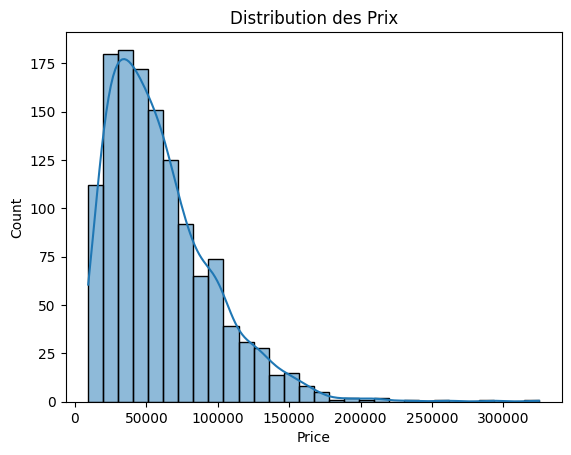

In [124]:
# Visualisation de base
sns.histplot(data['Price'], kde=True, bins=30)
plt.title("Distribution des Prix")
plt.show()

A travers le graphique ci dessus on peut observer la distribution des prix on peut voir que les prix varie varient aproximativement entre 10000(10k) et 320000(320k) avec une forte densite pours les ordinateur qui ont un prix compris entre 10000(10k) et 100000(100k)

                   Price
Company                 
Razer      178282.491429
LG         111834.720000
MSI         92116.226133
Google      89386.080000
Microsoft   85903.788000
Apple       83340.499886
Huawei      75870.720000
Samsung     75308.320000
Toshiba     67549.050000
Dell        63193.755782
Xiaomi      60390.882000
Asus        58830.143878
Lenovo      57882.563200
HP          56891.044222
Fujitsu     38841.120000
Acer        33394.615969
Chuwi       16745.726400
Mediacom    15717.600000
Vero        11584.404000


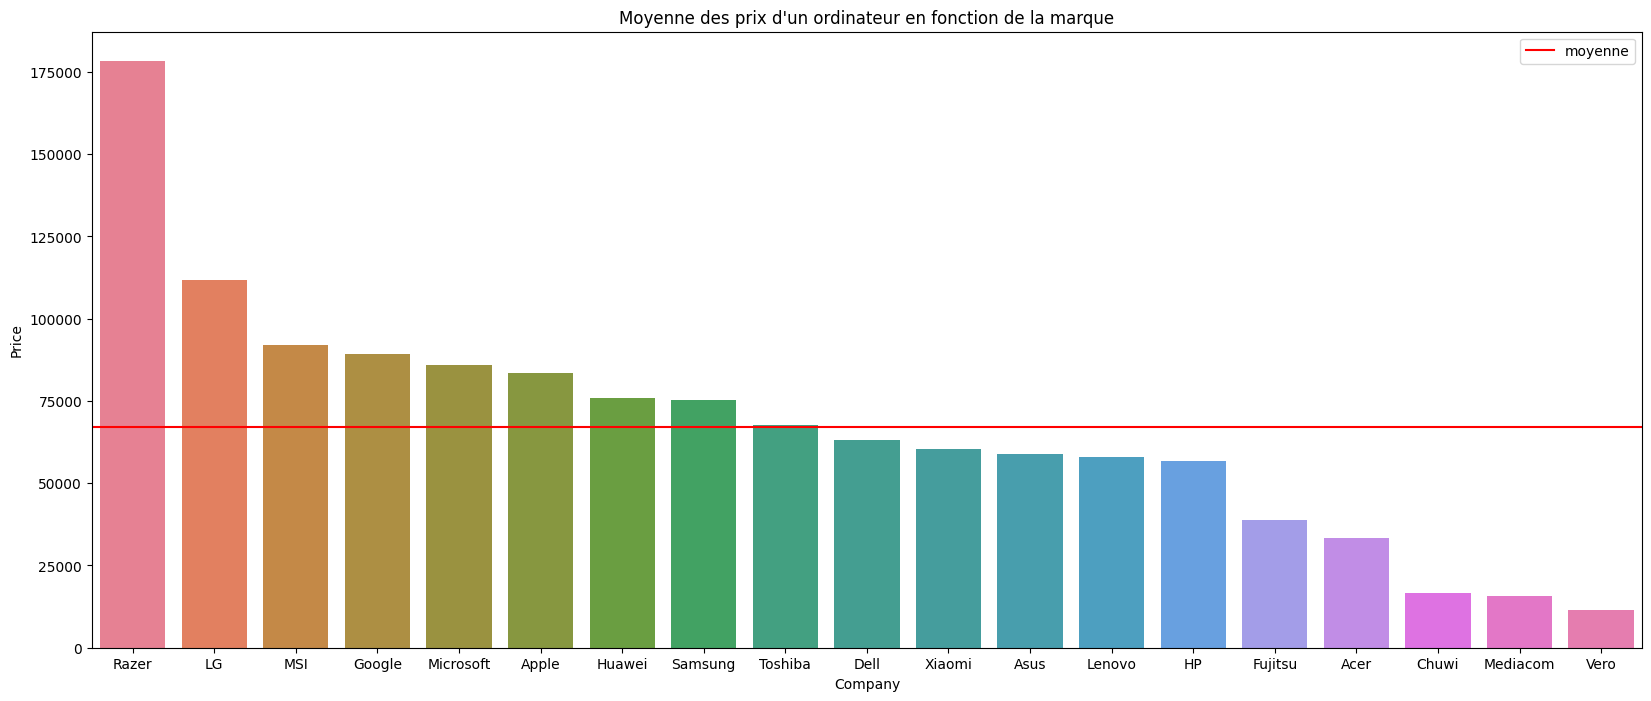

In [125]:
df = data.groupby('Company')['Price'].mean().to_frame()
df.sort_values(['Price'], ascending=False, inplace=True)
mean = df['Price'].mean()
print(df)

plt.figure(figsize=(20, 8))
sns.barplot(data=df, x=df.index, y='Price', hue=df.index)
plt.title("Moyenne des prix d'un ordinateur en fonction de la marque")
plt.axhline(mean, color='red', label = 'moyenne')
plt.legend()

In [126]:
print(df.index)

Index(['Razer', 'LG', 'MSI', 'Google', 'Microsoft', 'Apple', 'Huawei',
       'Samsung', 'Toshiba', 'Dell', 'Xiaomi', 'Asus', 'Lenovo', 'HP',
       'Fujitsu', 'Acer', 'Chuwi', 'Mediacom', 'Vero'],
      dtype='object', name='Company')


On a un apercu de la repartition en moyenne des prix des ordinateurs en fonction de la ***marque*** classes dans du plus cher au moins cher. On peut voir y determiner les marques qui en moyenne le prix de leurs ordinateurs sont plus chers que le prix moyen d'une machine.
En moyenne les ordinateurs de la marque ***Razer*** sont plus cher et que ceux de la marque ***Vero*** sont les moins chers

                            Price
TypeName                         
Workstation         121497.525683
Gaming               92247.960187
Ultrabook            82489.713429
2 in 1 Convertible   68326.360066
Notebook             41669.149113
Netbook              33898.440960


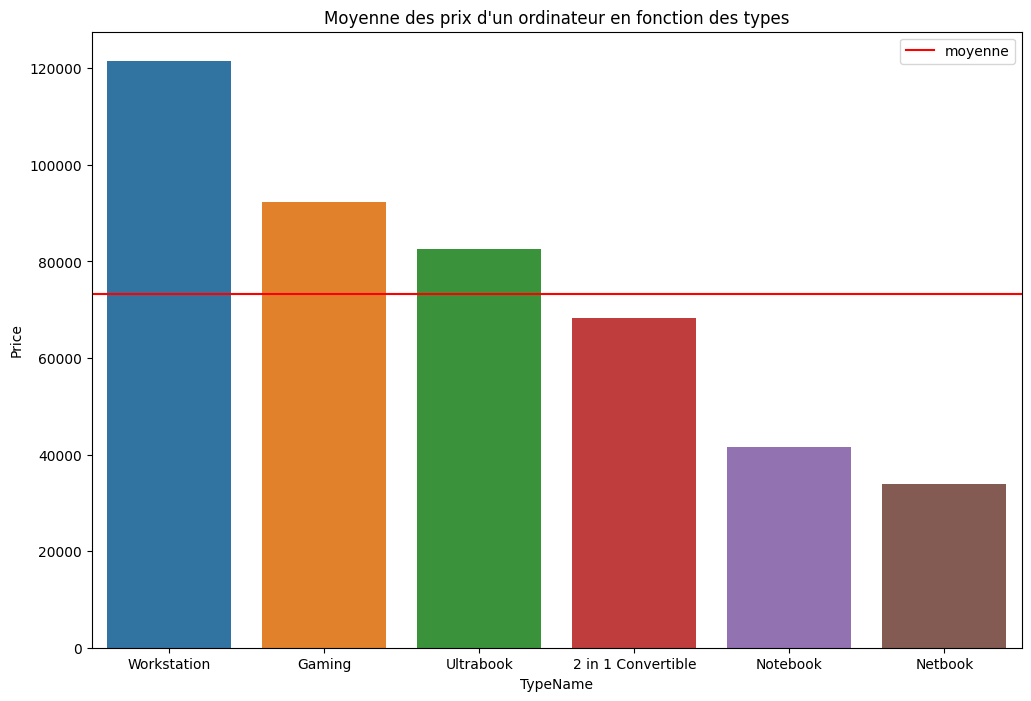

In [127]:
df = data.groupby(['TypeName'])['Price'].mean().to_frame()
df.sort_values(['Price'], ascending=False, inplace=True)
mean = df['Price'].mean()
print(df)
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x=df.index, y='Price', hue=df.index)
plt.title("Moyenne des prix d'un ordinateur en fonction des types")
plt.axhline(mean, color='red', label = 'moyenne')
plt.legend()

On a un apercu de la repartition en moyenne des prix des ordinateurs en fonction de leur ***types*** du plus cher au moins cher. On peut y determiner les types d'ordinateurs dont en moyenne le prix est superieur au prix moyen d'une machine.
En moyenne les ***workstations*** sont plus cher et que les ***netbooks*** sont les moins chers

# Pretraitement des donnees

Certaine colonnes necessitent d'etre formatte ou transforme dans le bon format pour que l'on puisse les utiliser sur le futur model

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [129]:
data[['Weight', 'Ram', 'Memory', 'ScreenResolution']]

,Weight,Ram,Memory,ScreenResolution
0,1.37kg,8GB,128GB SSD,IPS Panel Retina Display 2560x1600
1,1.34kg,8GB,128GB Flash Storage,1440x900
2,1.86kg,8GB,256GB SSD,Full HD 1920x1080
3,1.83kg,16GB,512GB SSD,IPS Panel Retina Display 2880x1800
4,1.37kg,8GB,256GB SSD,IPS Panel Retina Display 2560x1600
...,...,...,...,...
1298,1.8kg,4GB,128GB SSD,IPS Panel Full HD / Touchscreen 1920x1080
1299,1.3kg,16GB,512GB SSD,IPS Panel Quad HD+ / Touchscreen 3200x1800
1300,1.5kg,2GB,64GB Flash Storage,1366x768
1301,2.19kg,6GB,1TB HDD,1366x768


### Weight et Ram

Pour les colones ***Weight*** et ***Ram*** il suffit de supprimer l'unite de mesure et pour la colonne ***ScreenResolution*** extraire la hauteur et la largeur de l'ecran. Mais pour la colonne ***Memory*** il serait plus judicieux de considerer les differents types de memoire. 

In [130]:
data['Weight'] = data['Weight'].astype(str).str.replace('kg', '').astype(float)
data['Ram'] = data['Ram'].astype(str).str.replace('GB', '').astype(float)

data[['Weight', 'Ram']].head()

,Weight,Ram
0,1.37,8.0
1,1.34,8.0
2,1.86,8.0
3,1.83,16.0
4,1.37,8.0


### ScreenResolution

In [131]:
data['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [132]:
data['screen_width'] = data['ScreenResolution'].str.extract(r'(\d+)x').astype(int)
data['screen_height'] = data['ScreenResolution'].str.extract(r'x(\d+)').astype(int)
data = data.drop(columns=['ScreenResolution'])

data[["screen_width", "screen_height"]]

,screen_width,screen_height
0,2560,1600
1,1440,900
2,1920,1080
3,2880,1800
4,2560,1600
...,...,...
1298,1920,1080
1299,3200,1800
1300,1366,768
1301,1366,768


In [133]:
data.describe()

,Inches,Ram,Weight,Price,screen_width,screen_height
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,59870.042910,1894.784344,1070.830391
std,1.426304,5.084665,0.665475,37243.201786,494.641028,284.519410
min,10.100000,2.000000,0.690000,9270.720000,1366.000000,768.000000
25%,14.000000,4.000000,1.500000,31914.720000,1600.000000,900.000000
50%,15.600000,8.000000,2.040000,52054.560000,1920.000000,1080.000000
75%,15.600000,8.000000,2.300000,79274.246400,1920.000000,1080.000000
max,18.400000,64.000000,4.700000,324954.720000,3840.000000,2160.000000


### Memory

Maintenant nous allons Maintenant transformer la colone Memory en valeur numerique


In [134]:
data['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

Tout D'abord nous remarque que les valeur de cette colonne suivent une certaines structure. Dans le cas ou il y a plusieurs disques le type SSD est prioritaire et vient toujours en premier contraitrement au type HDD qui vient toujtours en derniers.
On peut etre tenter de faire un One-hot-encoding afin de pouvoir entrainer le modele avec ces valeurs 

In [135]:
import re
df = data['Memory'].to_frame()

# Fonction pour extraire les tailles par type
def extract_storage(storage_str, storage_type):
    pattern = rf'(\d+\.?\d*)[TtGg][Bb] {storage_type}'
    matches = re.findall(pattern, storage_str)
    total = sum(float(match) * (1024 if 'TB' in storage_str else 1) for match in matches)
    return total

# Créer les colonnes encodées
df['SSD'] = df['Memory'].apply(lambda x: extract_storage(x, 'SSD'))
df['HDD'] = df['Memory'].apply(lambda x: extract_storage(x, 'HDD'))
df['Flash Storage'] = df['Memory'].apply(lambda x: extract_storage(x, 'Flash Storage'))
df['Hybrid'] = df['Memory'].apply(lambda x: extract_storage(x, 'Hybrid'))

df.drop(columns=['Memory'], inplace=True)

df

,SSD,HDD,Flash Storage,Hybrid
0,128.0,0.0,0.0,0.0
1,0.0,0.0,128.0,0.0
2,256.0,0.0,0.0,0.0
3,512.0,0.0,0.0,0.0
4,256.0,0.0,0.0,0.0
...,...,...,...,...
1298,128.0,0.0,0.0,0.0
1299,512.0,0.0,0.0,0.0
1300,0.0,0.0,64.0,0.0
1301,0.0,1024.0,0.0,0.0


In [136]:
data = pd.concat([data, df], axis=1)
data.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,screen_width,screen_height,SSD,HDD,Flash Storage,Hybrid
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560,1600,128.0,0.0,0.0,0.0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440,900,0.0,0.0,128.0,0.0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920,1080,256.0,0.0,0.0,0.0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880,1800,512.0,0.0,0.0,0.0
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560,1600,256.0,0.0,0.0,0.0


In [137]:
data.drop(columns=['Memory'], inplace=True)
data.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,screen_width,screen_height,SSD,HDD,Flash Storage,Hybrid
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8.0,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560,1600,128.0,0.0,0.0,0.0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8.0,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440,900,0.0,0.0,128.0,0.0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8.0,Intel HD Graphics 620,No OS,1.86,30636.0000,1920,1080,256.0,0.0,0.0,0.0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16.0,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880,1800,512.0,0.0,0.0,0.0
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8.0,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560,1600,256.0,0.0,0.0,0.0


### Cpu et Gpu

In [138]:
data[['Cpu', 'Gpu']]

,Cpu,Gpu
0,Intel Core i5 2.3GHz,Intel Iris Plus Graphics 640
1,Intel Core i5 1.8GHz,Intel HD Graphics 6000
2,Intel Core i5 7200U 2.5GHz,Intel HD Graphics 620
3,Intel Core i7 2.7GHz,AMD Radeon Pro 455
4,Intel Core i5 3.1GHz,Intel Iris Plus Graphics 650
...,...,...
1298,Intel Core i7 6500U 2.5GHz,Intel HD Graphics 520
1299,Intel Core i7 6500U 2.5GHz,Intel HD Graphics 520
1300,Intel Celeron Dual Core N3050 1.6GHz,Intel HD Graphics
1301,Intel Core i7 6500U 2.5GHz,AMD Radeon R5 M330


In [139]:
df = data.loc[:,['Cpu', 'Gpu', 'Price']]

df['Cpu_marque'] = df['Cpu'].apply(lambda x: x.split()[0])
df['Gpu_marque'] = df['Gpu'].apply(lambda x: x.split()[0])

df

,Cpu,Gpu,Price,Cpu_marque,Gpu_marque
0,Intel Core i5 2.3GHz,Intel Iris Plus Graphics 640,71378.6832,Intel,Intel
1,Intel Core i5 1.8GHz,Intel HD Graphics 6000,47895.5232,Intel,Intel
2,Intel Core i5 7200U 2.5GHz,Intel HD Graphics 620,30636.0000,Intel,Intel
3,Intel Core i7 2.7GHz,AMD Radeon Pro 455,135195.3360,Intel,AMD
4,Intel Core i5 3.1GHz,Intel Iris Plus Graphics 650,96095.8080,Intel,Intel
...,...,...,...,...,...
1298,Intel Core i7 6500U 2.5GHz,Intel HD Graphics 520,33992.6400,Intel,Intel
1299,Intel Core i7 6500U 2.5GHz,Intel HD Graphics 520,79866.7200,Intel,Intel
1300,Intel Celeron Dual Core N3050 1.6GHz,Intel HD Graphics,12201.1200,Intel,Intel
1301,Intel Core i7 6500U 2.5GHz,AMD Radeon R5 M330,40705.9200,Intel,AMD


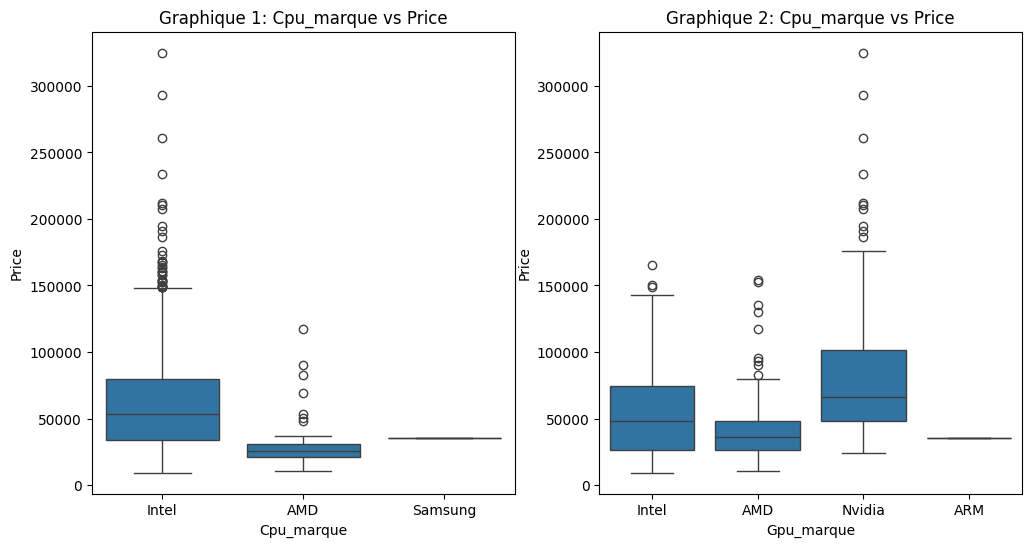

In [140]:
cpu_marque = df.groupby('Cpu_marque')['Price'].mean()
gpu_marque = df.groupby('Gpu_marque')['Price'].mean()


fig, ax = plt.subplots(1, 2, figsize=(12, 6))  

# premier graphique
sns.boxplot(data=df, x='Cpu_marque', y='Price', ax=ax[0])
ax[0].set_title('Graphique 1: Cpu_marque vs Price')

# deuxieme graphique
sns.boxplot(data=df, x='Gpu_marque', y='Price', ax=ax[1])
ax[1].set_title('Graphique 2: Cpu_marque vs Price')


plt.show()

On peut voir que les marques on un certain impacte sur le cpu et gpu donc on peut les garder comme des features

In [141]:
data['cpu_marque'] = df['Cpu_marque']
data['gpu_marque'] = df['Gpu_marque']
data[['cpu_marque', 'gpu_marque']]

,cpu_marque,gpu_marque
0,Intel,Intel
1,Intel,Intel
2,Intel,Intel
3,Intel,AMD
4,Intel,Intel
...,...,...
1298,Intel,Intel
1299,Intel,Intel
1300,Intel,Intel
1301,Intel,AMD


# Encodage des variables categoriques

Pour pouvoir entrainer notre models la transformation des variables categoriques en variable numeriques est obligatoire ce qui nous permettra de pouvoir les competer parmi les features lors de l'entrainnement.

Essayons de labeliser Company TypeName et OpSys des modeles  pour ce faire nous utiliseront le One-Hot-Encoding

In [142]:
company = pd.get_dummies(data['Company'], dtype=float)
company

,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
types = pd.get_dummies(data['TypeName'], dtype=float)
types

,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
1298,1.0,0.0,0.0,0.0,0.0,0.0
1299,1.0,0.0,0.0,0.0,0.0,0.0
1300,0.0,0.0,0.0,1.0,0.0,0.0
1301,0.0,0.0,0.0,1.0,0.0,0.0


In [144]:
system= pd.get_dummies(data['OpSys'], dtype=float)
system

,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
1298,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1299,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1300,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1301,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [145]:
data = pd.concat([data, types], axis=1)
data = pd.concat([data, company], axis=1)
data = pd.concat([data, system],axis=1)

data = data.drop(columns=['Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys'])
data

,Inches,Ram,Weight,Price,screen_width,screen_height,SSD,HDD,Flash Storage,Hybrid,...,Xiaomi,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,13.3,8.0,1.37,71378.6832,2560,1600,128.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,13.3,8.0,1.34,47895.5232,1440,900,0.0,0.0,128.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,15.6,8.0,1.86,30636.0000,1920,1080,256.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,15.4,16.0,1.83,135195.3360,2880,1800,512.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,13.3,8.0,1.37,96095.8080,2560,1600,256.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,4.0,1.80,33992.6400,1920,1080,128.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1299,13.3,16.0,1.30,79866.7200,3200,1800,512.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1300,14.0,2.0,1.50,12201.1200,1366,768,0.0,0.0,64.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1301,15.6,6.0,2.19,40705.9200,1366,768,0.0,1024.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Labelisoons les colonnes ***cpu_marque*** et ***gpu_marque*** ave du label encoding

In [146]:
data["cpu"],  cpu_labels = pd.factorize(data['cpu_marque'])
data["gpu"],  gpu_labels = pd.factorize(data['gpu_marque'])

data.drop(columns=['cpu_marque', "gpu_marque"], inplace=True)

print(cpu_labels, gpu_labels )
data.columns

Index(['Intel', 'AMD', 'Samsung'], dtype='object') Index(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype='object')


Index(['Inches', 'Ram', 'Weight', 'Price', 'screen_width', 'screen_height',
       'SSD', 'HDD', 'Flash Storage', 'Hybrid', '2 in 1 Convertible', 'Gaming',
       'Netbook', 'Notebook', 'Ultrabook', 'Workstation', 'Acer', 'Apple',
       'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG',
       'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba',
       'Vero', 'Xiaomi', 'Android', 'Chrome OS', 'Linux', 'Mac OS X', 'No OS',
       'Windows 10', 'Windows 10 S', 'Windows 7', 'macOS', 'cpu', 'gpu'],
      dtype='object')

# Feature Engeneering

L'etude des features est une etape importante car elle permet d'etudier les relations avec la variable cible.

La resolution de l'ecran a ete scinde en 2 variables ***screen_width*** et ***screen_height*** mais on peut essayer de les transformer pour obtenir le ratio avec '***screen_ratio***' = '***screen_width***' / '***screen_height***'


In [147]:
data['screen_ratio'] = data['screen_width'] / data['screen_height']
data['screen_ratio']

0       1.600000
1       1.600000
2       1.777778
3       1.600000
4       1.600000
          ...   
1298    1.777778
1299    1.777778
1300    1.778646
1301    1.778646
1302    1.778646
Name: screen_ratio, Length: 1303, dtype: float64

<Axes: >

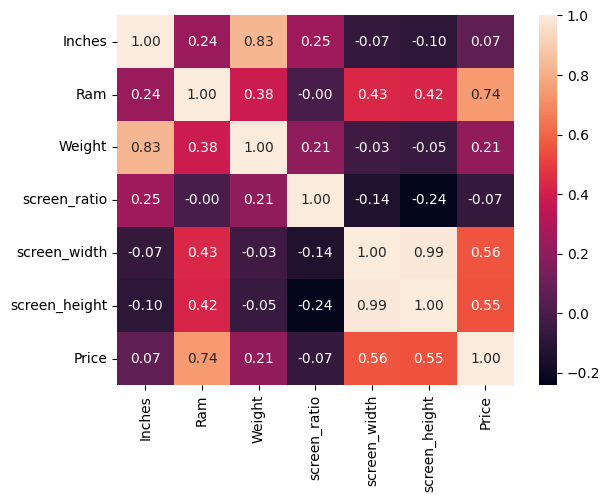

In [148]:
features_numeriques = ['Inches', 'Ram', 'Weight', 'screen_ratio', 'screen_width', 'screen_height', 'Price']
corr = data[features_numeriques].corr()
sns.heatmap(corr, annot=True, fmt=".2f")

On peut observer que nos feature on une assez bonne correlation positive avec notre variable cible ***Price*** surtout la variable Ram. On peut aussi voir que la taille de l'ecran ***inch*** n'est quasiment pas corele avec le label tout comme ***screen_ratio***

# Modelisation et Entrainement

Pour l'entrainements l'utilisation de model d'apprentissage supervise est necessaire car le dataset est labelise. La variables cibles etant continue nous utiliserons des models de regression

In [149]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


scaler = MinMaxScaler()
features_numeriques.remove('Price')
features_numeriques.remove('Inches')
features_numeriques.remove('screen_ratio')
data[features_numeriques] = scaler.fit_transform(data[features_numeriques])

X = data.drop(columns=['Price', 'Inches', 'screen_ratio'])
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
print(X_train.columns.to_list())

['Ram', 'Weight', 'screen_width', 'screen_height', 'SSD', 'HDD', 'Flash Storage', 'Hybrid', '2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook', 'Workstation', 'Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba', 'Vero', 'Xiaomi', 'Android', 'Chrome OS', 'Linux', 'Mac OS X', 'No OS', 'Windows 10', 'Windows 10 S', 'Windows 7', 'macOS', 'cpu', 'gpu']


### Regression Lineaire

In [150]:
from sklearn.metrics import root_mean_squared_error, r2_score


model = LinearRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)


rmse = root_mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"Arbre de decision- RMSE: {rmse:.2f}, R²: {r2:.2f}")

Arbre de decision- RMSE: 19289.78, R²: 0.78


### Arbre de decision 

In [151]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=9,random_state=30)
tree.fit(X_train, y_train)


y_predict = tree.predict(X_test)

rmse = root_mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"Arbre de decision- RMSE: {rmse:.2f}, R²: {r2:.2f}")

Arbre de decision- RMSE: 20033.62, R²: 0.76


### Random Forest

In [152]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=30)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Forêt Aléatoire - RMSE: {rmse:.2f}, R²: {r2:.2f}")

Forêt Aléatoire - RMSE: 19408.58, R²: 0.78


### Bagging

In [153]:
from sklearn.ensemble import BaggingRegressor

base_model = DecisionTreeRegressor(random_state=42)

bagging_model = BaggingRegressor(
    estimator=base_model,
    n_estimators=50,
    max_samples=0.8,
    max_features=0.8,
    bootstrap=True,
    random_state=30
)


bagging_model.fit(X_train, y_train)

y_pred = bagging_model.predict(X_test)


rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Bagging - RMSE: {rmse:.2f}, R²: {r2:.2f}")

Bagging - RMSE: 18427.75, R²: 0.80


### Boosting

In [154]:
from sklearn.ensemble import AdaBoostRegressor

base_model = DecisionTreeRegressor(max_depth=12)


adaboost_model = AdaBoostRegressor(
    estimator=base_model,
    n_estimators=100,
    learning_rate=0.1,
    random_state=30
)


adaboost_model.fit(X_train, y_train)

y_pred = adaboost_model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"AdaBoost - RMSE: {rmse:.2f}, R²: {r2:.2f}")


AdaBoost - RMSE: 19105.32, R²: 0.78


### Descent de Gradient (Gradient Boosting)

In [155]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=350, learning_rate=0.1, max_depth=5, random_state=30)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost - RMSE: {rmse:.2f}, R²: {r2:.2f}")


XGBoost - RMSE: 17452.90, R²: 0.82


On peut voir que les differents models on des scores assez correctte. Le XGBRegressor a le meilleur score et la perte (RMSE) la plus faible, donc nous utiliserons ce modele pour cos fututrs predictions. Mais avent de continuer faisons quelsques tests 

[0]	validation_0-rmse:33608.58224	validation_1-rmse:38506.70522
[1]	validation_0-rmse:31321.83649	validation_1-rmse:36287.48332
[2]	validation_0-rmse:29240.41582	validation_1-rmse:34427.60957
[3]	validation_0-rmse:27434.99502	validation_1-rmse:32827.91723
[4]	validation_0-rmse:25822.22233	validation_1-rmse:31484.80346
[5]	validation_0-rmse:24396.58100	validation_1-rmse:30123.78957
[6]	validation_0-rmse:23097.29176	validation_1-rmse:29114.47672
[7]	validation_0-rmse:21997.47748	validation_1-rmse:28004.69086
[8]	validation_0-rmse:21035.54623	validation_1-rmse:27031.14629
[9]	validation_0-rmse:20149.07290	validation_1-rmse:26326.28028
[10]	validation_0-rmse:19348.30602	validation_1-rmse:25693.61349
[11]	validation_0-rmse:18596.60873	validation_1-rmse:25038.00805
[12]	validation_0-rmse:17913.34141	validation_1-rmse:24454.28416
[13]	validation_0-rmse:17348.21390	validation_1-rmse:23883.43361
[14]	validation_0-rmse:16807.79411	validation_1-rmse:23399.69843
[15]	validation_0-rmse:16306.29316	

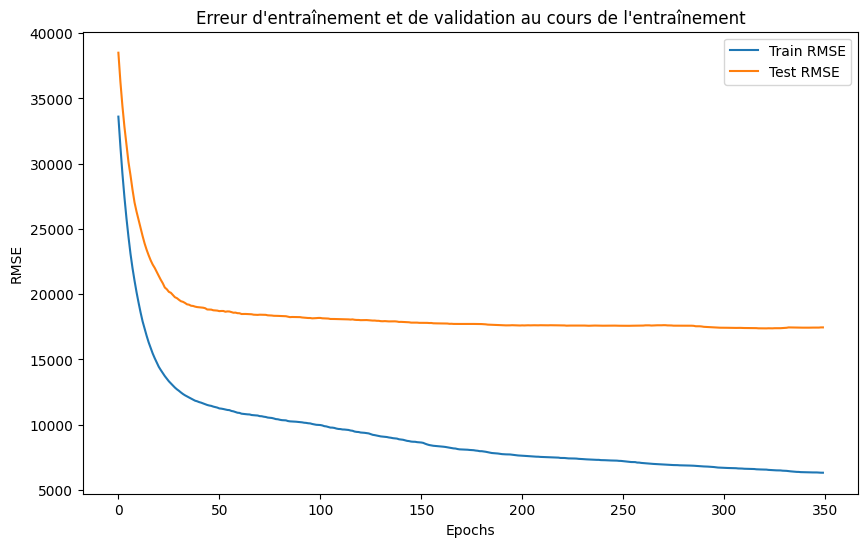

XGBoost - RMSE: 17452.90, R²: 0.82


In [156]:
# Modèle
xgb_model = XGBRegressor(n_estimators=350, learning_rate=0.1, max_depth=5, random_state=30)

# Définir l'ensemble d'évaluation
evals = [(X_train, y_train), (X_test, y_test)]

# Entraîner le modèle avec suivi de l'évaluation
xgb_model.fit(X_train, y_train,  
              eval_set=evals,  
              verbose=True,)

# Prédictions
y_pred = xgb_model.predict(X_test)



# Plot des courbes d'erreur
results = xgb_model.evals_result()
epochs = len(results['validation_0']['rmse'])

# Plot des erreurs d'entraînement et de validation
plt.figure(figsize=(10,6))
plt.plot(range(epochs), results['validation_0']['rmse'], label="Train RMSE")
plt.plot(range(epochs), results['validation_1']['rmse'], label="Test RMSE")
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.title("Erreur d'entraînement et de validation au cours de l'entraînement")
plt.legend()
plt.show()

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost - RMSE: {rmse:.2f}, R²: {r2:.2f}")


On peut voir a traver la courbe que le modele souffre d'un leger overfitting car apre un certain nombre d'epoque l'erreur de validation des test ne diminuent plus alors que celui de l'entrainement continue a diminuer. 

Pour corriger cela on va ajuster les hyperparametres 

[0]	validation_0-rmse:34957.11669	validation_1-rmse:39721.48196
[1]	validation_0-rmse:33773.91315	validation_1-rmse:38618.60346
[2]	validation_0-rmse:32734.22869	validation_1-rmse:37668.28716
[3]	validation_0-rmse:31767.75645	validation_1-rmse:36596.64144
[4]	validation_0-rmse:30856.48868	validation_1-rmse:35802.19621
[5]	validation_0-rmse:30049.28039	validation_1-rmse:35042.83866
[6]	validation_0-rmse:29320.83943	validation_1-rmse:34205.94118
[7]	validation_0-rmse:28639.18623	validation_1-rmse:33583.20991
[8]	validation_0-rmse:28000.00714	validation_1-rmse:33034.86680
[9]	validation_0-rmse:27455.35060	validation_1-rmse:32382.77703
[10]	validation_0-rmse:26950.15627	validation_1-rmse:31894.22825
[11]	validation_0-rmse:26482.87140	validation_1-rmse:31493.86423
[12]	validation_0-rmse:26027.30997	validation_1-rmse:31066.33663
[13]	validation_0-rmse:25608.77367	validation_1-rmse:30685.59806
[14]	validation_0-rmse:25237.25855	validation_1-rmse:30333.54667
[15]	validation_0-rmse:24878.97325	

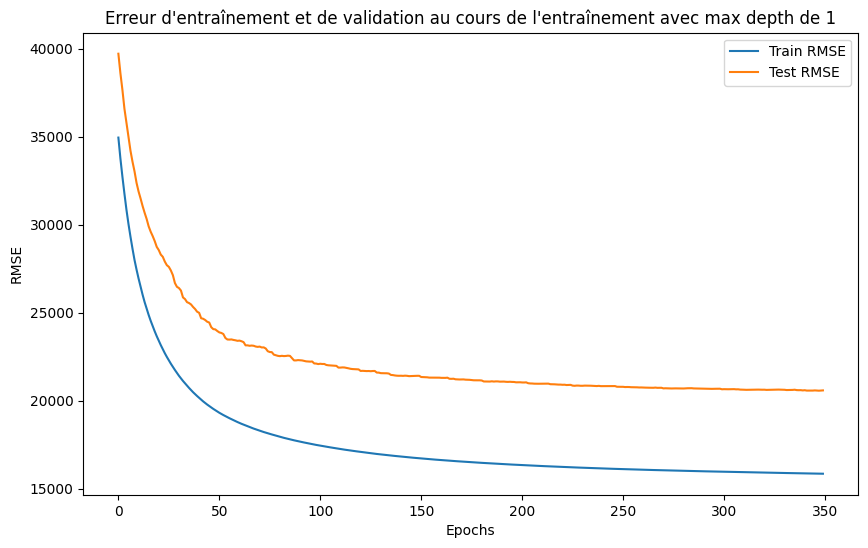

XGBoost - RMSE: 20593.61, R²: 0.75
[0]	validation_0-rmse:34218.23483	validation_1-rmse:39086.48795
[1]	validation_0-rmse:32519.96515	validation_1-rmse:37394.19786
[2]	validation_0-rmse:31059.11683	validation_1-rmse:36032.88283
[3]	validation_0-rmse:29771.15513	validation_1-rmse:34727.82321
[4]	validation_0-rmse:28650.87623	validation_1-rmse:33770.19109
[5]	validation_0-rmse:27651.77395	validation_1-rmse:32797.84799
[6]	validation_0-rmse:26776.28130	validation_1-rmse:32053.85480
[7]	validation_0-rmse:25910.94533	validation_1-rmse:30916.46517
[8]	validation_0-rmse:25225.66809	validation_1-rmse:30203.45605
[9]	validation_0-rmse:24577.99233	validation_1-rmse:29559.93860
[10]	validation_0-rmse:23950.00910	validation_1-rmse:28674.69635
[11]	validation_0-rmse:23425.84448	validation_1-rmse:27904.35232
[12]	validation_0-rmse:22966.12441	validation_1-rmse:27491.86233
[13]	validation_0-rmse:22531.30188	validation_1-rmse:27037.30058
[14]	validation_0-rmse:22096.93686	validation_1-rmse:26576.08930


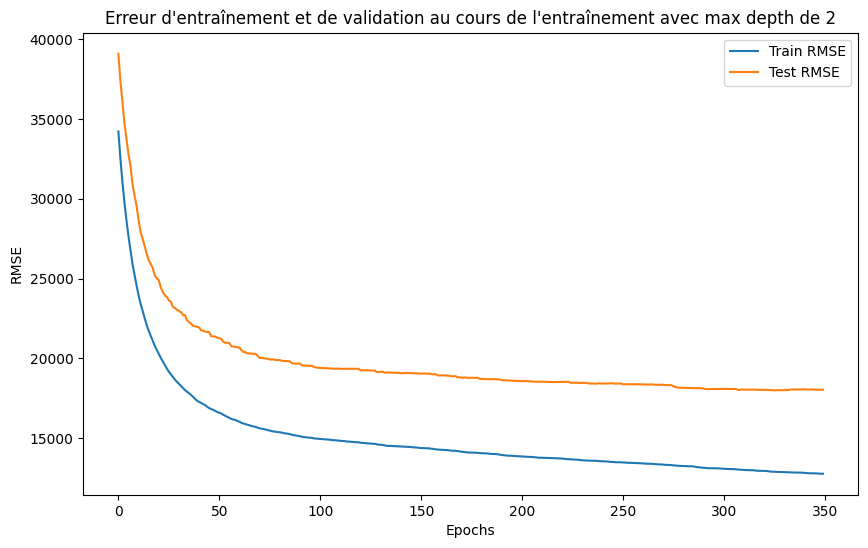

XGBoost - RMSE: 18032.49, R²: 0.81
[0]	validation_0-rmse:33939.24409	validation_1-rmse:38793.39707
[1]	validation_0-rmse:31909.33947	validation_1-rmse:36848.43976
[2]	validation_0-rmse:30153.90761	validation_1-rmse:35165.33147
[3]	validation_0-rmse:28646.08701	validation_1-rmse:33470.82880
[4]	validation_0-rmse:27323.15247	validation_1-rmse:32168.84853
[5]	validation_0-rmse:26165.20751	validation_1-rmse:30866.97891
[6]	validation_0-rmse:25146.87997	validation_1-rmse:29936.45226
[7]	validation_0-rmse:24202.70410	validation_1-rmse:28989.94818
[8]	validation_0-rmse:23380.65799	validation_1-rmse:28197.59791
[9]	validation_0-rmse:22620.98684	validation_1-rmse:27519.77845
[10]	validation_0-rmse:21974.69590	validation_1-rmse:26862.65456
[11]	validation_0-rmse:21383.68538	validation_1-rmse:26302.13374
[12]	validation_0-rmse:20834.31373	validation_1-rmse:25627.52098
[13]	validation_0-rmse:20363.47904	validation_1-rmse:25253.10486
[14]	validation_0-rmse:19944.95384	validation_1-rmse:24796.49675


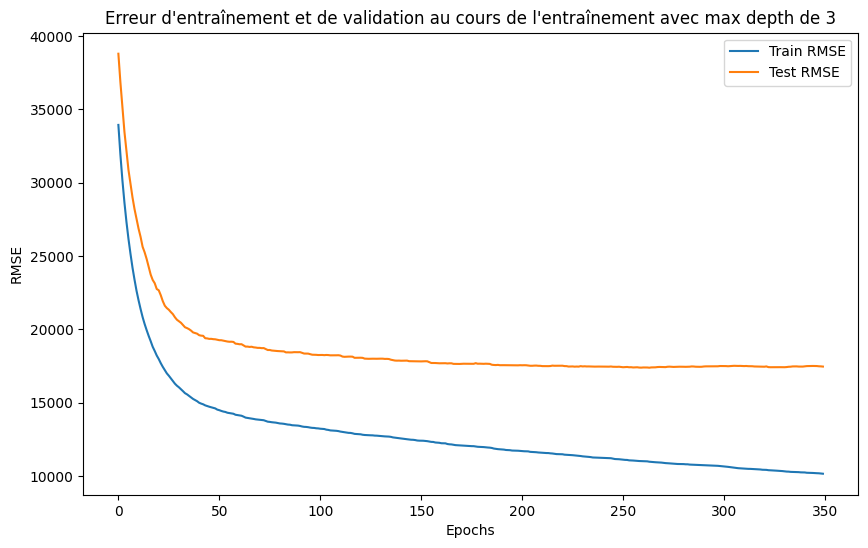

XGBoost - RMSE: 17458.86, R²: 0.82
[0]	validation_0-rmse:33764.99263	validation_1-rmse:38634.92380
[1]	validation_0-rmse:31577.38815	validation_1-rmse:36578.16194
[2]	validation_0-rmse:29613.56972	validation_1-rmse:34798.36897
[3]	validation_0-rmse:27900.12642	validation_1-rmse:33257.51173
[4]	validation_0-rmse:26402.93138	validation_1-rmse:31805.23570
[5]	validation_0-rmse:25097.79407	validation_1-rmse:30458.05730
[6]	validation_0-rmse:23945.52284	validation_1-rmse:29339.05109
[7]	validation_0-rmse:22878.52284	validation_1-rmse:28387.72356
[8]	validation_0-rmse:21885.39314	validation_1-rmse:27578.17690
[9]	validation_0-rmse:21066.56231	validation_1-rmse:26887.76712
[10]	validation_0-rmse:20318.96814	validation_1-rmse:26329.21320
[11]	validation_0-rmse:19699.29448	validation_1-rmse:25481.72432
[12]	validation_0-rmse:19071.87424	validation_1-rmse:24960.60596
[13]	validation_0-rmse:18511.58583	validation_1-rmse:24283.74350
[14]	validation_0-rmse:18049.63411	validation_1-rmse:23708.33228


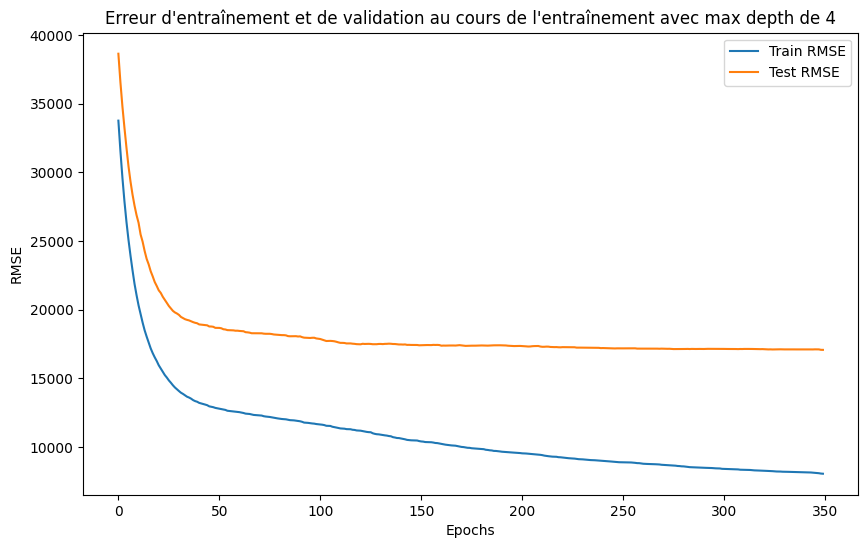

XGBoost - RMSE: 17083.30, R²: 0.83
[0]	validation_0-rmse:33608.58224	validation_1-rmse:38506.70522
[1]	validation_0-rmse:31321.83649	validation_1-rmse:36287.48332
[2]	validation_0-rmse:29240.41582	validation_1-rmse:34427.60957
[3]	validation_0-rmse:27434.99502	validation_1-rmse:32827.91723
[4]	validation_0-rmse:25822.22233	validation_1-rmse:31484.80346
[5]	validation_0-rmse:24396.58100	validation_1-rmse:30123.78957
[6]	validation_0-rmse:23097.29176	validation_1-rmse:29114.47672
[7]	validation_0-rmse:21997.47748	validation_1-rmse:28004.69086
[8]	validation_0-rmse:21035.54623	validation_1-rmse:27031.14629
[9]	validation_0-rmse:20149.07290	validation_1-rmse:26326.28028
[10]	validation_0-rmse:19348.30602	validation_1-rmse:25693.61349
[11]	validation_0-rmse:18596.60873	validation_1-rmse:25038.00805
[12]	validation_0-rmse:17913.34141	validation_1-rmse:24454.28416
[13]	validation_0-rmse:17348.21390	validation_1-rmse:23883.43361
[14]	validation_0-rmse:16807.79411	validation_1-rmse:23399.69843


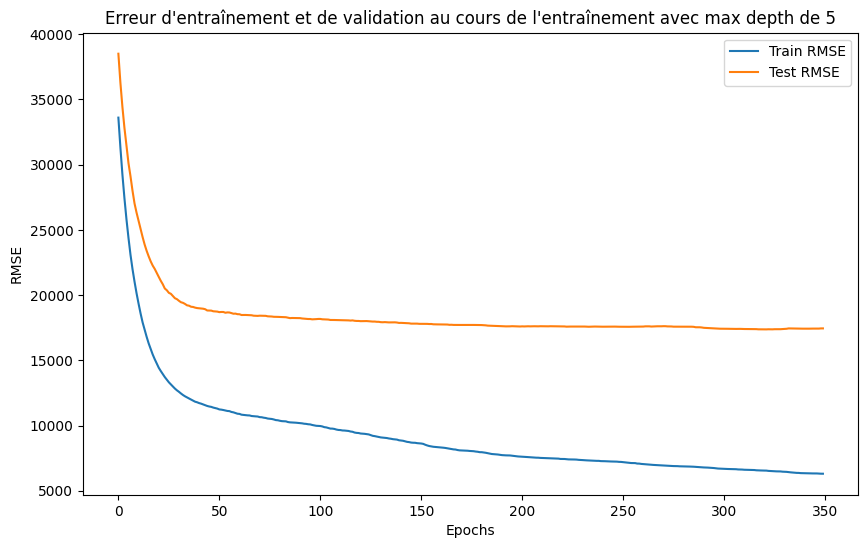

XGBoost - RMSE: 17452.90, R²: 0.82


In [157]:
for i in np.arange(1,6):
    xgb_model = XGBRegressor(n_estimators=350, learning_rate=0.1, max_depth=i, random_state=30)

    evals = [(X_train, y_train), (X_test, y_test)]

    xgb_model.fit(X_train, y_train,  
                eval_set=evals,  
                verbose=True,)

    y_pred = xgb_model.predict(X_test)


    results = xgb_model.evals_result()
    epochs = len(results['validation_0']['rmse'])

    plt.figure(figsize=(10,6))
    plt.plot(range(epochs), results['validation_0']['rmse'], label="Train RMSE")
    plt.plot(range(epochs), results['validation_1']['rmse'], label="Test RMSE")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE")
    plt.title(f"Erreur d'entraînement et de validation au cours de l'entraînement avec max depth de {i}")
    plt.legend()
    plt.show()
    
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"XGBoost - RMSE: {rmse:.2f}, R²: {r2:.2f}")

Pour l'hyperparametre max_depth 4 semble etre le meilleur choit pour le model

[0]	validation_0-rmse:34976.03336	validation_1-rmse:39842.04109
[1]	validation_0-rmse:33822.82846	validation_1-rmse:38691.82398
[2]	validation_0-rmse:32703.87314	validation_1-rmse:37661.15612
[3]	validation_0-rmse:31682.63102	validation_1-rmse:36656.35749
[4]	validation_0-rmse:30685.51561	validation_1-rmse:35753.96741
[5]	validation_0-rmse:29755.11752	validation_1-rmse:34915.48917
[6]	validation_0-rmse:28883.30140	validation_1-rmse:34103.01876
[7]	validation_0-rmse:28068.82616	validation_1-rmse:33339.85225
[8]	validation_0-rmse:27312.81374	validation_1-rmse:32533.04717
[9]	validation_0-rmse:26584.15222	validation_1-rmse:31820.29724
[10]	validation_0-rmse:25912.96352	validation_1-rmse:31138.42974
[11]	validation_0-rmse:25278.27032	validation_1-rmse:30548.21168
[12]	validation_0-rmse:24683.53079	validation_1-rmse:29960.75093
[13]	validation_0-rmse:24115.02504	validation_1-rmse:29413.73902
[14]	validation_0-rmse:23575.08757	validation_1-rmse:28939.42595
[15]	validation_0-rmse:23061.64468	

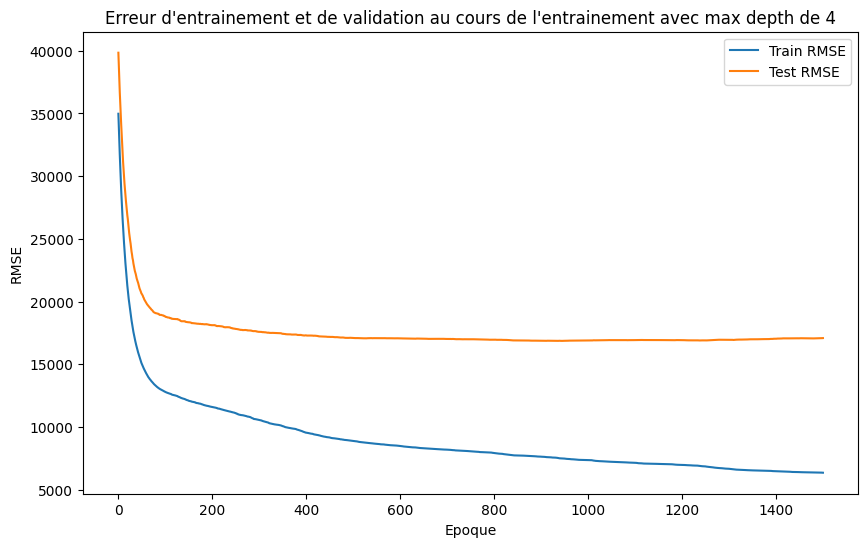

XGBoost - RMSE: 17088.74, R²: 0.83


In [158]:
xgb_model = XGBRegressor(n_estimators=1500, learning_rate=0.05, max_depth=4, random_state=30)

evals = [(X_train, y_train), (X_test, y_test)]

xgb_model.fit(X_train, y_train,  
            eval_set=evals,  
            verbose=True,)

y_pred = xgb_model.predict(X_test)


results = xgb_model.evals_result()
epochs = len(results['validation_0']['rmse'])

plt.figure(figsize=(10,6))
plt.plot(range(epochs), results['validation_0']['rmse'], label="Train RMSE")
plt.plot(range(epochs), results['validation_1']['rmse'], label="Test RMSE")
plt.xlabel("Epoque")
plt.ylabel("RMSE")
plt.title(f"Erreur d'entrainement et de validation au cours de l'entrainement avec max depth de 4")
plt.legend()
plt.show()

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost - RMSE: {rmse:.2f}, R²: {r2:.2f}")

In [159]:
import pickle

# Sauvegarder le modele
with open("model.pkl", "wb") as file:
    pickle.dump(xgb_model, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)